**Created By :** *Aakash Khandelwal*  
*8th May 2019*  

## **Work In Progress**



### Key Data Observations
* Total no. of observations is 27820 and 12 columns namely -
    * country
    * year 
    * sex 
    * age 
    * suicides_no 
    * population 
    * suicides/100k pop 
    * country-year 
    * HDI for year
    * gdp_for_year 
    * gdp_per_capita 
    * generation
* HDI for year has missing values for more than 19K records which makes of around 70% of total no. of observations.
* Data is missing for various countries for various years but in 2016, no suicides data is available for 85 countries.




In [35]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geonamescache

# read data
suicides_data = pd.read_csv('master.csv')

In [89]:
#pd.DataFrame(zip(suicides_data.columns,suicides_data.notnull().sum(),suicides_data.isnull().sum()),columns = ['ColumnName', 'Non-Missing Values','Missing Values'])
data = suicides_data.drop(['HDI for year'], axis = 1)

by_countryYear = data.groupby('country')['year'].nunique().reset_index()
countries = list(by_countryYear[by_countryYear['year']>=10]['country'])
data = data[data['country'].isin(countries)]

gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
mapping = pd.DataFrame(countries).T.reset_index()[['name','continentcode']]
mapping.rename(columns = {'name':'country'}, inplace=True)
mapping['country'] = mapping['country'].replace({'Macao':'Macau',
                                   'Czechia':'Czech Republic',
                                   'South Korea':'Republic of Korea',
                                   'Russia':'Russian Federation',
                                   'Saint Vincent and the Grenadines':'Saint Vincent and Grenadines'})

data = pd.merge(data,mapping,on='country', how = 'left')
data['continentcode'] = data['continentcode'].replace({'EU':'Europe',
                                   'AS':'Asia',
                                   'NA':'North America',
                                   'SA':'South America',
                                   'AF':'Africa',
                                   'OC':'Oceania'})

data['continentcode'] = pd.Categorical(data['continentcode'])
data['age'] = pd.Categorical(data['age'])
data['age'].cat.reorder_categories(['5-14 years','15-24 years','25-34 years',
                                    '35-54 years','55-74 years','75+ years'], inplace = True)
data['generation'] = pd.Categorical(data['generation'])
data['generation'].cat.reorder_categories(['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'],
                                          inplace = True)
data['country'] = pd.Categorical(data['country'])
data['sex'] = pd.Categorical(data['sex'])
data.rename(columns = {'continentcode':'continent'},inplace = True)

#data.pivot_table(values = 'suicides_no',index = 'country',columns = 'year',aggfunc='sum').isnull().sum()
data = data[data['year'] != 2016]

## Suicide Rate trend across year by continent, age group, gender and generations

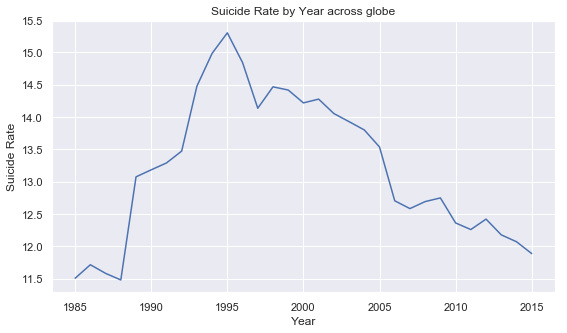

In [45]:
plt.figure(figsize=(9,5))
by_year = data.groupby(['year'])[['population','suicides_no']].sum().reset_index()
by_year['suicide_rate'] = by_year['suicides_no']*100000/by_year['population']
ax = sns.lineplot(x="year", y="suicide_rate",data=by_year)
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Suicide Rate by Year across globe')
plt.show()

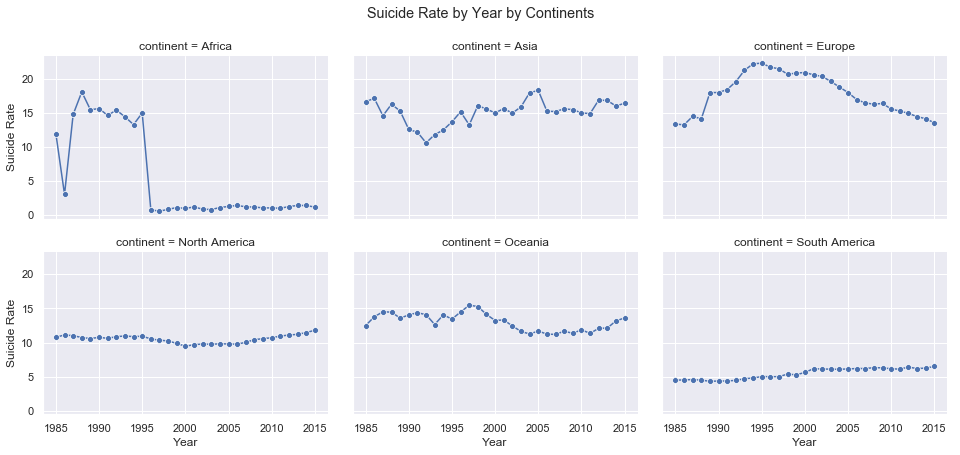

In [54]:
by_continent = data.groupby(['continent','year'])[['population','suicides_no']].sum().reset_index()
by_continent['suicide_rate'] = by_continent['suicides_no']*100000/by_continent['population']
sns.set_style("darkgrid")
ax = sns.relplot(x="year", y="suicide_rate", col="continent",col_wrap=3,
                 data=by_continent , kind="line", legend="full", marker='o',
                height=3, aspect=1.5)
ax.set(ylabel='Suicide Rate', xlabel='Year')
ax.fig.suptitle('Suicide Rate by Year by Continents', x=0.5, y=1.05)
plt.show()

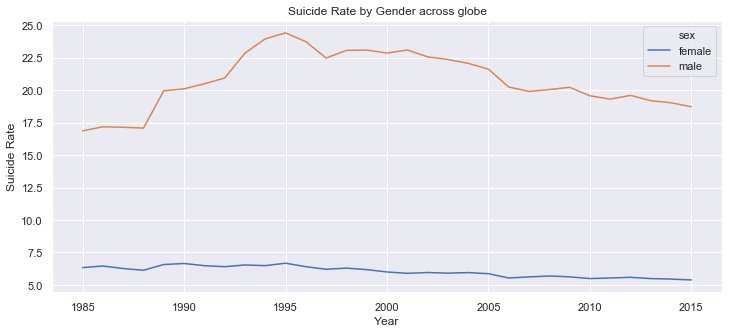

In [56]:
plt.figure(figsize=(12,5))
by_year = data.groupby(['year','sex'])[['population','suicides_no']].sum().reset_index()
by_year['suicide_rate'] = by_year['suicides_no']*100000/by_year['population']
ax = sns.lineplot(x="year", y="suicide_rate",hue = 'sex',data=by_year,  legend="full")
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Suicide Rate by Gender across globe')
plt.show()

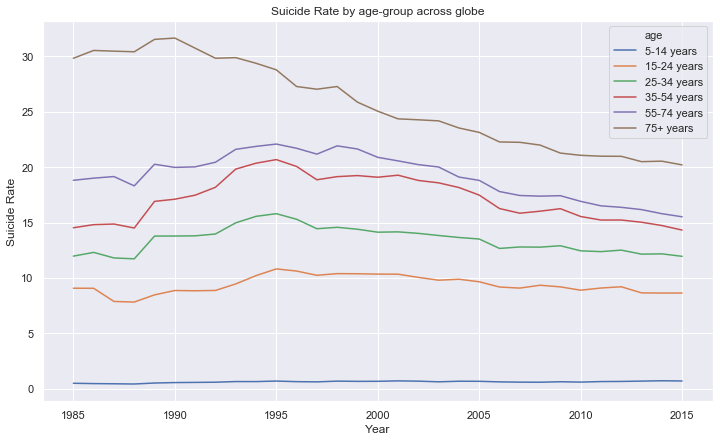

In [58]:
plt.figure(figsize=(12,7))
by_year = data.groupby(['year','age'])[['population','suicides_no']].sum().reset_index()
by_year['suicide_rate'] = by_year['suicides_no']*100000/by_year['population']
ax = sns.lineplot(x="year", y="suicide_rate",hue = 'age',data=by_year,  legend="full")
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Suicide Rate by age-group across globe')
plt.show()

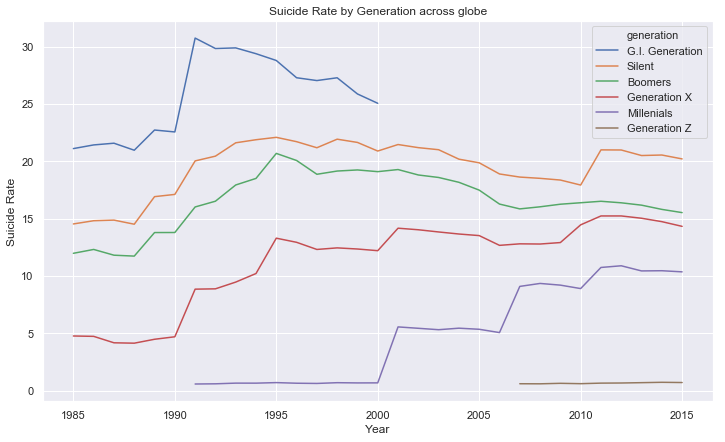

In [59]:
plt.figure(figsize=(12,7))
by_year = data.groupby(['year','generation'])[['population','suicides_no']].sum().reset_index()
by_year['suicide_rate'] = by_year['suicides_no']*100000/by_year['population']
ax = sns.lineplot(x="year", y="suicide_rate",hue = 'generation',data=by_year,  legend="full")
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Suicide Rate by Generation across globe')
plt.show()

## By gender, age and generation

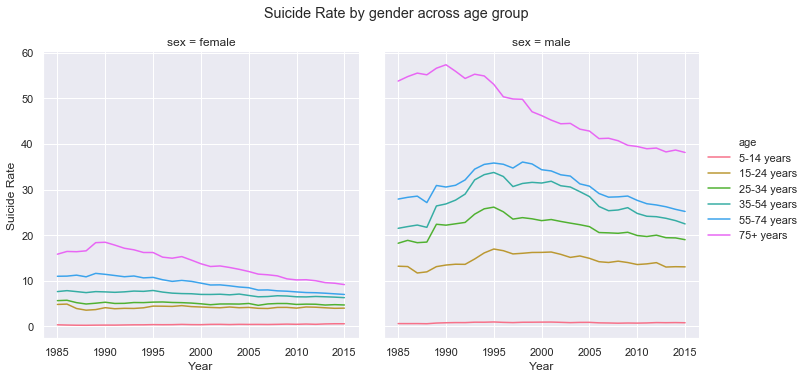

In [88]:
by_sex = data.groupby(['year','sex','age'])[['population','suicides_no']].sum().reset_index()
by_sex['suicide_rate'] = by_sex['suicides_no']*100000/by_sex['population']
ax = sns.relplot(x="year", y="suicide_rate", hue="age",  col="sex",data=by_sex,  kind="line", legend="full",
                height=5, aspect=1)
ax.set(ylabel='Suicide Rate', xlabel='Year')
ax.fig.suptitle('Suicide Rate by gender across age group', x=0.5, y=1.05)
plt.show()
plt.show()

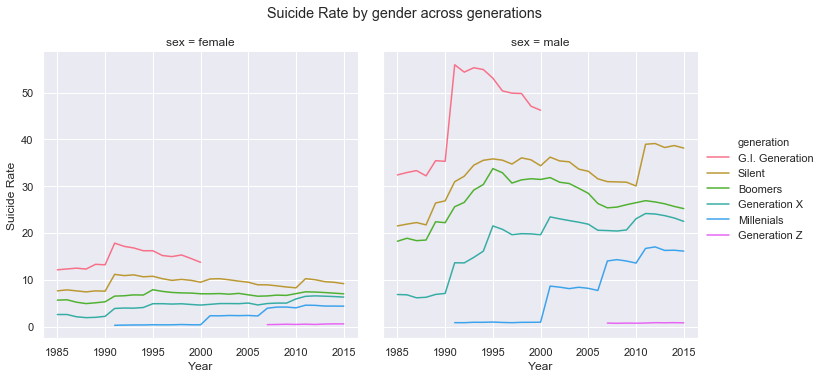

In [87]:
by_gen_year = data.groupby(['year','sex','generation'])[['population','suicides_no']].sum().reset_index()
by_gen_year['suicide_rate'] = by_gen_year['suicides_no']*100000/by_gen_year['population']
ax = sns.relplot(x="year", y="suicide_rate", hue="generation",  col="sex",data=by_gen_year,  kind="line", legend="full",
                height=5, aspect=1)
ax.set(ylabel='Suicide Rate', xlabel='Year')
ax.fig.suptitle('Suicide Rate by gender across generations', x=0.5, y=1.05)
plt.show()

## By generation and age group

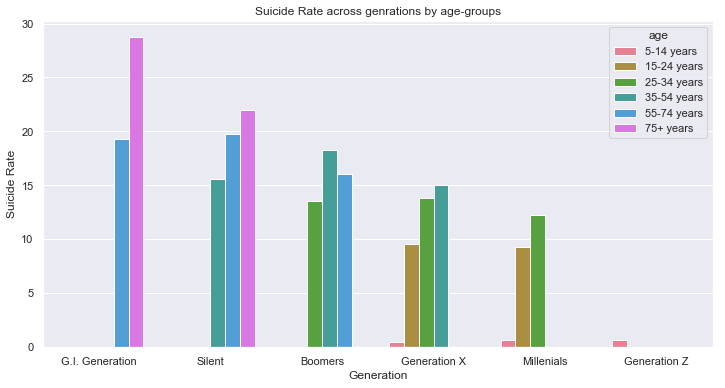

In [83]:
age_gen_suicideno = data.pivot_table(values = 'suicides_no',index = 'generation',columns = 'age',aggfunc='sum')
age_gen_population = data.pivot_table(values = 'population',index = 'generation',columns = 'age',aggfunc='sum')
by_age_gen = age_gen_suicideno*100000/age_gen_population
by_age_gen = by_age_gen.stack().reset_index(name='suicide_rate')
plt.figure(figsize=(12,6))
sns.set_palette("husl", 6)
ax = sns.barplot(x = 'generation',y = 'suicide_rate', hue='age',data=by_age_gen)
ax.legend(loc =1, title = 'age')
ax.set(ylabel='Suicide Rate', xlabel='Generation', title = 'Suicide Rate across genrations by age-groups')
plt.show()

## By GDP

,gdp_per_capita ($),suicide_rate
gdp_per_capita ($),1.000000,0.061979
suicide_rate,0.061979,1.000000


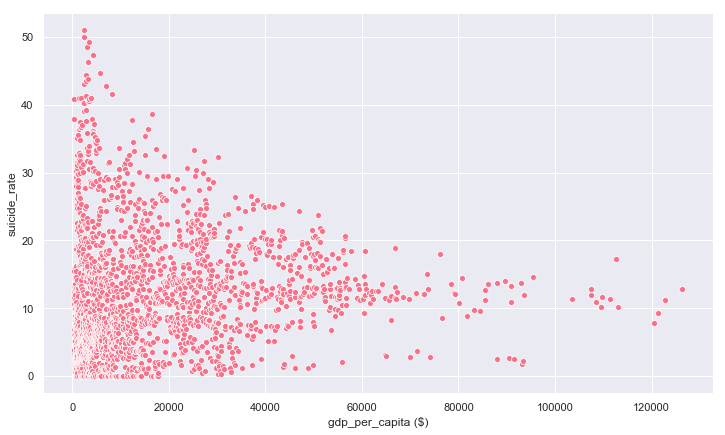

In [28]:
by_gdpcapita = data.groupby(['gdp_per_capita ($)'])[['population','suicides_no']].sum().reset_index()
by_gdpcapita['suicide_rate'] = by_gdpcapita['suicides_no']*100000/by_gdpcapita['population']
plt.figure(figsize=(12,7))
sns.scatterplot(x="gdp_per_capita ($)", y="suicide_rate", data=by_gdpcapita)
by_gdpcapita[['gdp_per_capita ($)','suicide_rate']].corr()

,gdp_per_capita ($),suicide_rate
gdp_per_capita ($),1.000000,0.088597
suicide_rate,0.088597,1.000000


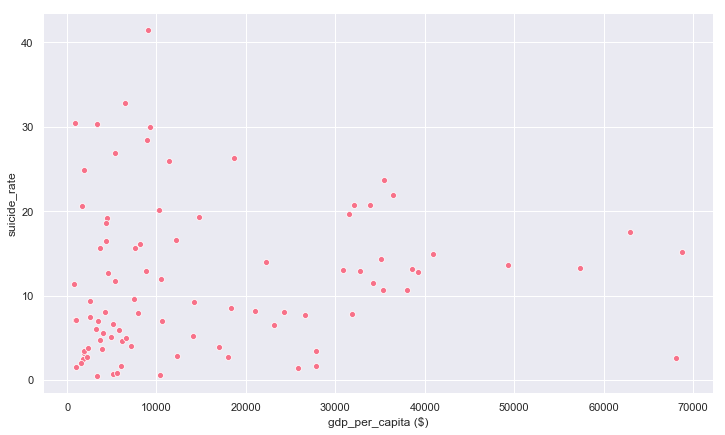

In [29]:
by_gdp_country = data.groupby(['country']).agg({'population':'sum', 
                         'suicides_no':'sum', 
                         'gdp_per_capita ($)':'mean'}).reset_index()
by_gdp_country['suicide_rate'] = by_gdp_country['suicides_no']*100000/by_gdp_country['population']
plt.figure(figsize=(12,7))
sns.scatterplot(x="gdp_per_capita ($)", y="suicide_rate", data=by_gdp_country)
by_gdp_country[['gdp_per_capita ($)','suicide_rate']].corr()

## Countries with increasing/decreasing trend in suicide rate throughout the time period

In [97]:
dm = data.groupby(['country','year'])['suicides_no','population'].sum().reset_index()
dm['suicide_rate'] = dm['suicides_no']*100000/dm['population']

In [98]:
dm = dm[dm['suicides_no'].notnull()]

In [99]:
from sklearn.linear_model import LinearRegression
b = []
for country in dm.country.unique():
    tempdf = dm[dm['country'] == country]
    X = np.asarray(tempdf['year']).reshape([-1,1])
    y = np.asarray(tempdf['suicide_rate']).reshape([-1,1])
    model = LinearRegression()
    results = model.fit(X,y).coef_[0][0]
    b.append([country,results])

In [100]:
df = pd.DataFrame(b,columns=['country','factor']).sort_values(by='factor')

In [101]:
decrease = list(df['country'].head(10))

In [102]:
increase = list(df['country'].tail(10))

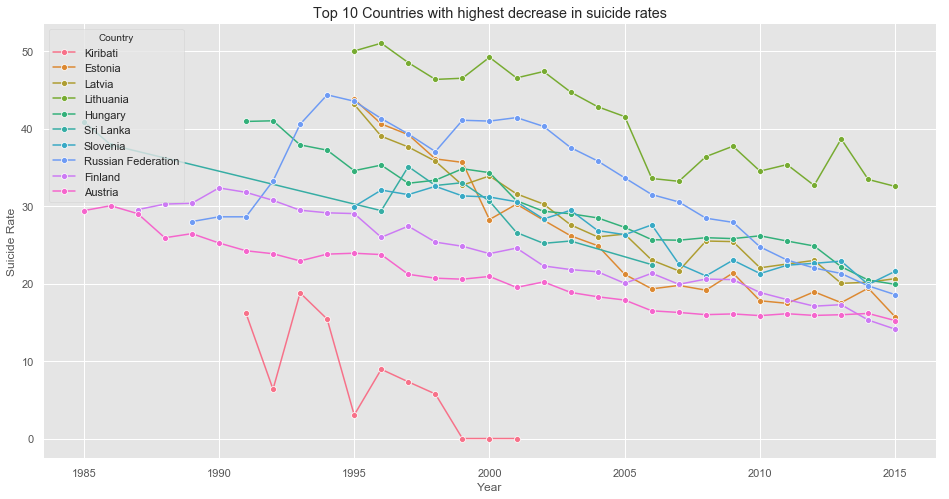

In [115]:
plt.figure(figsize=(16,8))
leg = []
sns.set_palette("husl", 10)
for country in decrease:
    dm_country = dm[dm['country'] == country]
    ax = sns.lineplot(x="year", y="suicide_rate",data=dm_country, marker='o')
    leg.append(country)

plt.legend(title='Country', loc='upper left', labels=leg)
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Top 10 Countries with highest decrease in suicide rates')
plt.show()

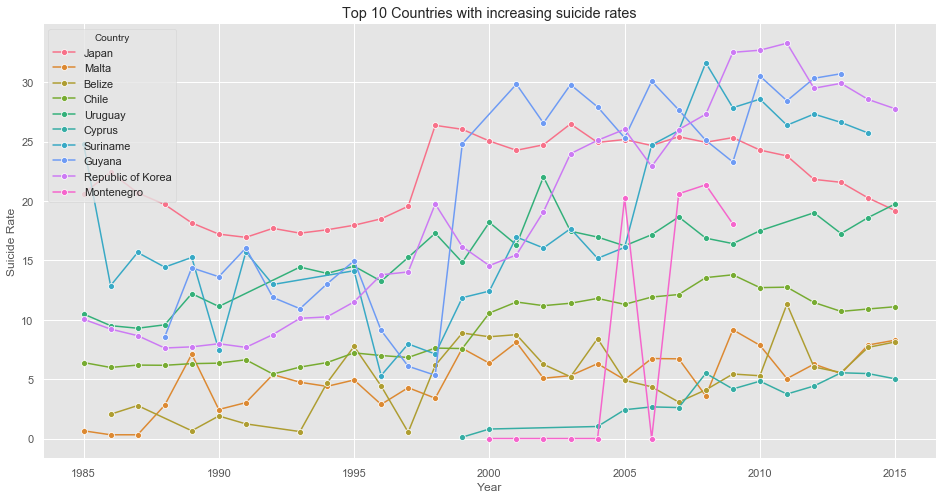

In [113]:
plt.figure(figsize=(16,8))
leg = []
sns.set_palette("husl", 10)
for country in increase:
    dm_country = dm[dm['country'] == country]
    ax = sns.lineplot(x="year", y="suicide_rate",data=dm_country, marker='o')
    leg.append(country)

plt.legend(title='Country', loc='best', labels=leg)
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Top 10 Countries with hghest increase in suicide rates')
plt.show()

## By human development index 

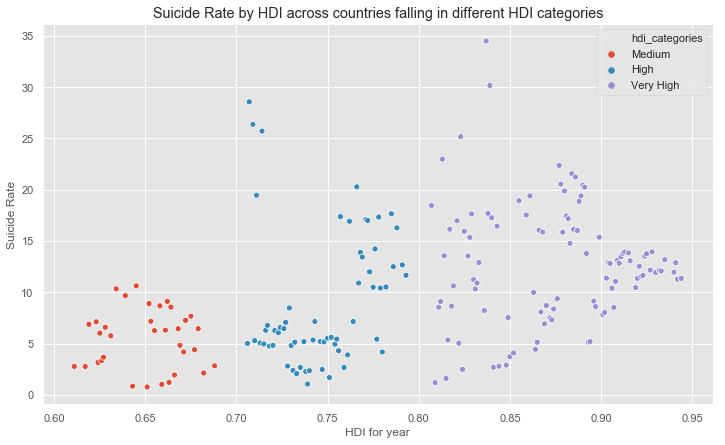

,HDI for year,suicide_rate
HDI for year,1.000000,0.426826
suicide_rate,0.426826,1.000000


In [95]:
data_withHDI = suicides_data.copy()
data_withHDI = data_withHDI[data_withHDI['HDI for year'].notnull()]
#data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year').isnull().sum()
data_withHDI = data_withHDI[data_withHDI['year'].isin([2010,2011,2012,2013,2014])]
#data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year').isnull().sum()
countries = list(data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year') \
                 .dropna().reset_index()['country'])
data_withHDI = data_withHDI[data_withHDI['country'].isin(countries)]
#data_withHDI.pivot_table(values = 'HDI for year',index = 'country',columns = 'year').isnull().sum()
by_hdi = data_withHDI.groupby(['HDI for year'])[['population','suicides_no']].sum().reset_index()
by_hdi['suicide_rate'] = by_hdi['suicides_no']*100000/by_hdi['population']
by_hdi['hdi_categories'] = np.where(by_hdi['HDI for year'] >=0.8, "Very High",
                             np.where(by_hdi['HDI for year'].between(0.7,0.799), "High",
                             np.where(by_hdi['HDI for year'].between(0.555,0.699),"Medium","Low")))

plt.figure(figsize=(12,7))
plt.style.use('ggplot')
ax = sns.scatterplot(x="HDI for year", y="suicide_rate", hue= 'hdi_categories', data=by_hdi)
ax.set(ylabel='Suicide Rate', xlabel='HDI for year', title = 'Suicide Rate by HDI across countries falling in different HDI categories')
plt.show()
by_hdi[['HDI for year','suicide_rate']].corr()